<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; text-align: left;font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Jan Attig</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken  &mdash; Ising Modell 1
</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2019</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2019-CompPhys.shtml)

# Das Ising Modell

Das Ising Modell ist ein klassisches Spin-Modell welches sogenannte Ising Spins auf einem Quadratgitter beschreibt. Ising Spins können die Werte $\sigma_\alpha = \pm 1$ annehmen. Der komplette Hamiltonian des Modells ist

\begin{equation}
    \mathcal{H} = -J \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha \sigma_\beta
\end{equation}

wobei die Summe über nächste Nachbarn auf dem Quadratgitter ausgeführt wird (siehe unten stehende Abbildung). $\alpha$ und $\beta$  bezeichnen dabei die Indices der verschiedenen Spins und können z.B. durch die Indices in den Gitterkoordinaten ausgedrückt werden: $\alpha = (i,j)$.

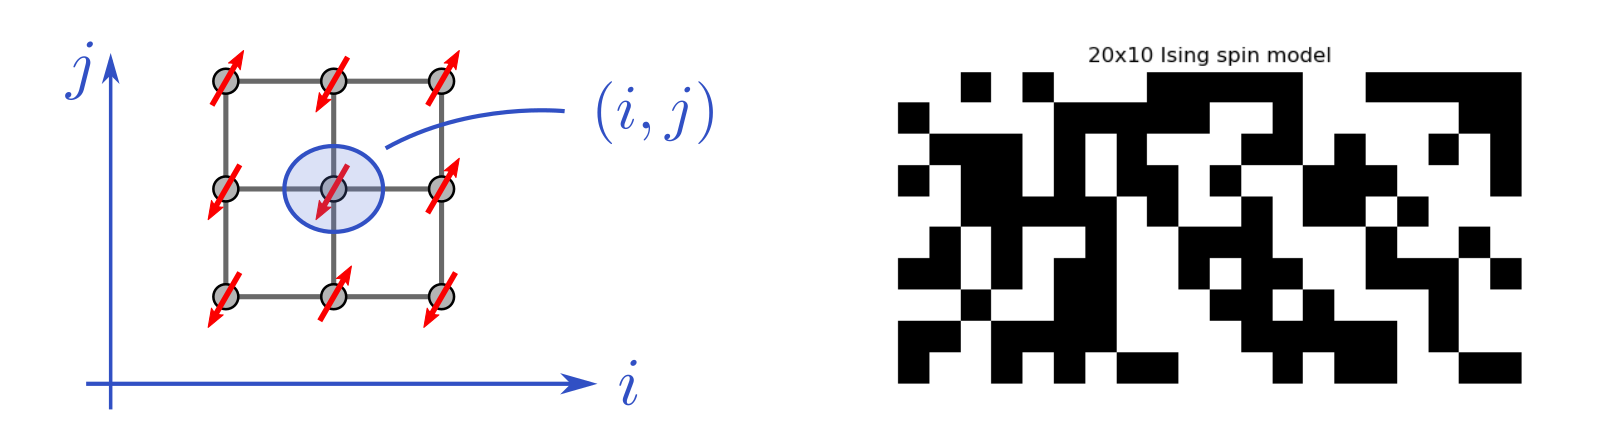

# Ising spins erzeugen und darstellen

In [1]:
function get_Ising_spin()
    if rand() > 0.5
        return +1
    else
        return -1
    end
end

get_Ising_spin (generic function with 1 method)

In [11]:
function get_Ising_spins(Lx, Ly)
    spins = zeros(Int64, Lx, Ly)
    for i in 1:Lx
    for j in 1:Ly
        spins[i,j] = get_Ising_spin()
    end
    end
    return spins
end

get_Ising_spins (generic function with 1 method)

In [21]:
using PyPlot
pygui(false)

function plot_Ising_spins(spins)
    figure()
    imshow(spins'[end:-1:1,:])
    axis("off")
end

plot_Ising_spins (generic function with 1 method)

#### Testen von Erzeugung und Plotten

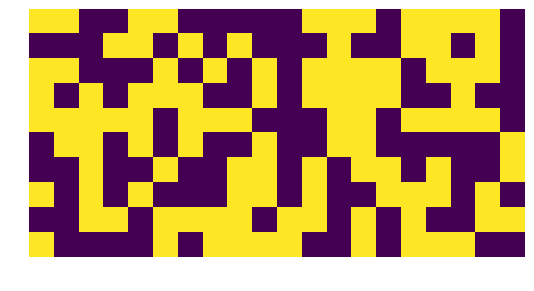

(-0.5, 19.5, 9.5, -0.5)

In [23]:
spins = get_Ising_spins(20, 10)
plot_Ising_spins(spins)

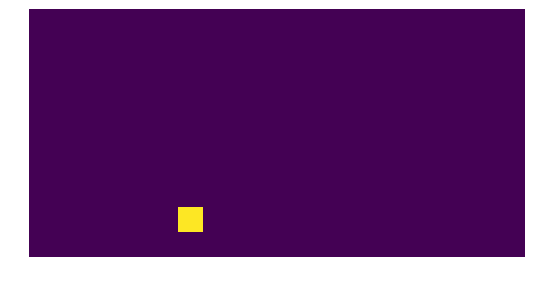

(-0.5, 19.5, 9.5, -0.5)

In [26]:
spins = get_Ising_spins(20,10) .* 0 .- 1
spins[7, 2] = +1
plot_Ising_spins(spins)

# Nachbarschaft und Nachbarsummen

In [32]:
function get_NN_sum(spin_array, i,j)
    neighbor_sum = 0
    # (i,j) rechts
    if i < size(spin_array)[1]
        neighbor_sum += spin_array[i+1,j]
    else 
        neighbor_sum += spin_array[1, j]
    end
    
    # (i,j) links
    if i > 1
        neighbor_sum += spin_array[i-1,j]
    else
        neighbor_sum += spin_array[end,j]
    end
    
    # (i,j) oben
    if j < size(spin_array)[2]
        neighbor_sum += spin_array[i,j+1]
    else
        neighbor_sum += spin_array[i,1]
    end
    
    # (i,j) unten
    if j > 1
        neighbor_sum += spin_array[i,j-1]
    else
        neighbor_sum += spin_array[i,end]
    end
    
    return neighbor_sum
end

get_NN_sum (generic function with 1 method)

#### Testen der Nachbarsummen

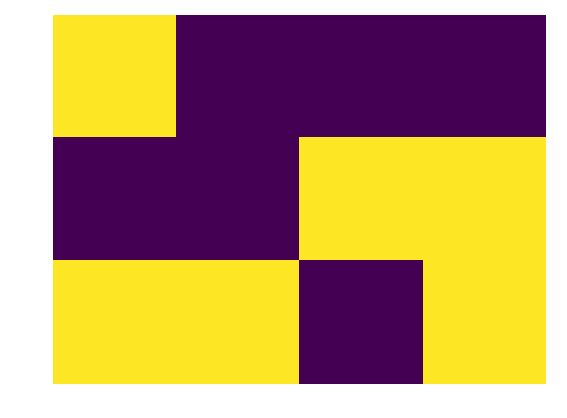

2


In [34]:
spins = get_Ising_spins(4,3)
plot_Ising_spins(spins)
println(get_NN_sum(spins, 1,1))

# Energie berechnen

In [35]:
function get_energy_of_spin(spin_array, J, i,j)
    return (-J/2) * spin_array[i,j] * get_NN_sum(spin_array, i,j)
end

get_energy_of_spin (generic function with 1 method)

In [37]:
function get_energy(spin_array, J)
    energy = 0.0
    for i in 1:size(spin_array)[1]
    for j in 1:size(spin_array)[2]
        energy += get_energy_of_spin(spin_array, J, i,j)
    end
    end
    return energy
end

get_energy (generic function with 1 method)

#### Test der Energieberechnung

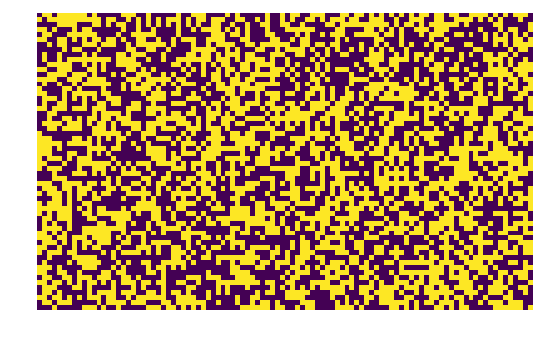

0.0


(-0.5, 99.5, 59.5, -0.5)

In [43]:
spins = get_Ising_spins(100, 60)
J = +1
println( get_energy(spins, J)/(size(spins)[1]*size(spins)[2]) )
plot_Ising_spins(spins)

# Metropolis Algorithmus

### Single Spin Flip update

In [44]:
function update_SSF!(spin_array, J, T)
    # Update vorschlagen
    i = rand(1:size(spin_array)[1])
    j = rand(1:size(spin_array)[2])
    # dE ausrechnen
    dE = 2*J*spin_array[i,j]*get_NN_sum(spin_array, i,j)
    # Akzeptieren Ja / Nein
    if rand() < exp(-dE / T)
        # JA
        spin_array[i,j] *= -1
    else
        # NEIN
    end
end

update_SSF! (generic function with 1 method)

### Single Spin Flip sweep

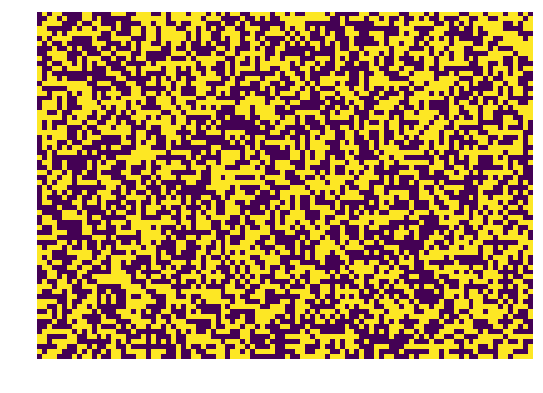

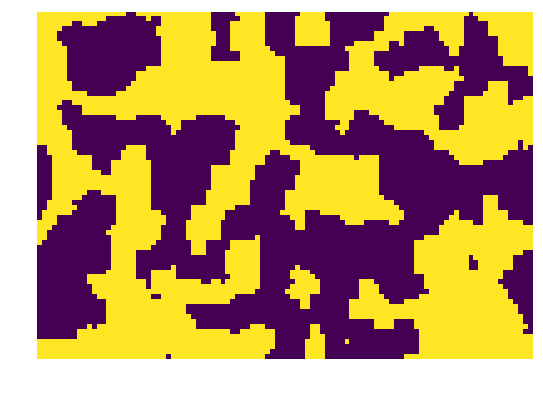

(-0.5, 99.5, 69.5, -0.5)

In [50]:
spins = get_Ising_spins(100, 70)
plot_Ising_spins(spins)

J = +1
T = 0.9

for s in 1:100000
    update_SSF!(spins, J, T)
end

plot_Ising_spins(spins)

### Test des Metropolis Algorithmus